In [33]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

# Simulate the arrival
arr_rate = 2
srv_rate = 4
duration = 18000
t = 0
jobs_iat = []
while t <= duration:
    iat = np.random.exponential(1/arr_rate)
    t += iat
    jobs_iat.append(iat)

# Simulate the service
i = 0
waiting_times = []
response_times = []
queue = []
in_service = [0,0] #[service_start,end]
busy_times = []
queue_size = [[0,0]]
t = 0

for job in jobs_iat:
    t += jobs_iat[i]
    st = np.random.exponential(1/srv_rate)
    #print(t)
    if t > in_service[1] and len(queue) > 0: #server is empty, but there jobs waiting in queue
        #fifoing the existing queue retroactively
        while(t>in_service[1] and len(queue) > 0):
            popped = queue.pop(0)
            pop_st = popped[0]
            start_queue = popped[1]
            queue_size.append([in_service[1],len(queue)])
            waiting_times.append(in_service[1]-start_queue)
            in_service = [in_service[1], in_service[1]+pop_st]
            busy_times.append(in_service)
            response_times.append(in_service[1]-start_queue)
            print('Arrived and put in queue at '+str(round(start_queue,3)))
            print('Waiting in queue for '+str(round(in_service[0]-start_queue,3)))
            print('In service for '+str(round(pop_st,3))+', from '+str(round(in_service[0],3))+' until '+str(round(in_service[1],3)))
            print('---------')
    if t > in_service[1] and len(queue) == 0: #server is (still) empty and queue is also empty
       #get in service
        waiting_times.append(0)
        in_service = [t,t+st]
        busy_times.append(in_service)
        response_times.append(st)
        print('Arrived at: '+str(round(t,3)))
        print('In service for '+str(round(st,3))+', until '+str(round(t+st,3)))
        print('---------')
    else: #server is busy, regardless of queue
        queue.append([st,t])
        queue_size.append([t,len(queue)])
    i += 1

# Derive the idle times
idle_times = [[0,busy_times[0][0]]]
for i in range(1,len(busy_times)):
    if busy_times[i][0] != busy_times[i-1][1]:
        idle_times.append([busy_times[i-1][1],busy_times[i][0]])
        
# Derive server busyness jump times
jump_times = [[0,0]]

i = 1
j = 0
while i < len(idle_times) and j < len(busy_times):
    i = min(i,len(idle_times)-1)
    j = min(j,len(busy_times)-1)
    if idle_times[i][0] < busy_times[j][0]:
        if jump_times[-1][1] == 1:
            jump_times.append([idle_times[i][0],0])
        i+=1
    else:
        if jump_times[-1][1] == 0:
            jump_times.append([busy_times[j][0],1])
        j+=1

Arrived at: 2.099
In service for 0.48, until 2.579
---------
Arrived at: 3.035
In service for 0.29, until 3.325
---------
Arrived at: 3.644
In service for 0.011, until 3.655
---------
Arrived at: 3.893
In service for 0.047, until 3.94
---------
Arrived at: 5.177
In service for 0.206, until 5.383
---------
Arrived and put in queue at 5.261
Waiting in queue for 0.122
In service for 0.335, from 5.383 until 5.718
---------
Arrived at: 5.834
In service for 0.463, until 6.297
---------
Arrived and put in queue at 6.204
Waiting in queue for 0.094
In service for 0.021, from 6.297 until 6.318
---------
Arrived at: 7.175
In service for 0.371, until 7.546
---------
Arrived and put in queue at 7.35
Waiting in queue for 0.196
In service for 0.038, from 7.546 until 7.583
---------
Arrived at: 7.656
In service for 0.113, until 7.769
---------
Arrived at: 8.017
In service for 0.354, until 8.371
---------
Arrived at: 8.824
In service for 0.498, until 9.322
---------
Arrived at: 9.703
In service for 0.4

Arrived and put in queue at 619.819
Waiting in queue for 0.543
In service for 0.702, from 620.362 until 621.064
---------
Arrived and put in queue at 619.977
Waiting in queue for 1.087
In service for 0.365, from 621.064 until 621.429
---------
Arrived and put in queue at 620.696
Waiting in queue for 0.733
In service for 0.002, from 621.429 until 621.431
---------
Arrived and put in queue at 620.909
Waiting in queue for 0.521
In service for 0.011, from 621.431 until 621.441
---------
Arrived and put in queue at 621.078
Waiting in queue for 0.363
In service for 0.391, from 621.441 until 621.832
---------
Arrived and put in queue at 621.287
Waiting in queue for 0.545
In service for 0.084, from 621.832 until 621.916
---------
Arrived at: 622.778
In service for 0.44, until 623.218
---------
Arrived and put in queue at 622.947
Waiting in queue for 0.271
In service for 0.723, from 623.218 until 623.942
---------
Arrived and put in queue at 623.769
Waiting in queue for 0.172
In service for 0.2

---------
Arrived at: 1085.75
In service for 0.183, until 1085.933
---------
Arrived at: 1085.966
In service for 0.071, until 1086.037
---------
Arrived at: 1086.25
In service for 0.067, until 1086.318
---------
Arrived at: 1087.364
In service for 0.43, until 1087.794
---------
Arrived and put in queue at 1087.385
Waiting in queue for 0.41
In service for 0.516, from 1087.794 until 1088.311
---------
Arrived and put in queue at 1087.71
Waiting in queue for 0.601
In service for 0.485, from 1088.311 until 1088.796
---------
Arrived and put in queue at 1087.83
Waiting in queue for 0.965
In service for 0.265, from 1088.796 until 1089.061
---------
Arrived and put in queue at 1088.746
Waiting in queue for 0.315
In service for 0.079, from 1089.061 until 1089.14
---------
Arrived at: 1089.283
In service for 0.053, until 1089.336
---------
Arrived and put in queue at 1089.285
Waiting in queue for 0.051
In service for 0.312, from 1089.336 until 1089.649
---------
Arrived and put in queue at 1089

Arrived and put in queue at 1593.016
Waiting in queue for 0.533
In service for 0.311, from 1593.549 until 1593.86
---------
Arrived and put in queue at 1593.168
Waiting in queue for 0.693
In service for 0.004, from 1593.86 until 1593.864
---------
Arrived and put in queue at 1593.213
Waiting in queue for 0.651
In service for 0.079, from 1593.864 until 1593.943
---------
Arrived and put in queue at 1593.213
Waiting in queue for 0.73
In service for 0.456, from 1593.943 until 1594.399
---------
Arrived and put in queue at 1593.512
Waiting in queue for 0.887
In service for 0.011, from 1594.399 until 1594.409
---------
Arrived and put in queue at 1594.232
Waiting in queue for 0.177
In service for 0.648, from 1594.409 until 1595.058
---------
Arrived and put in queue at 1594.33
Waiting in queue for 0.728
In service for 0.086, from 1595.058 until 1595.144
---------
Arrived and put in queue at 1594.754
Waiting in queue for 0.39
In service for 0.568, from 1595.144 until 1595.712
---------
Arriv

Waiting in queue for 0.331
In service for 0.166, from 2125.455 until 2125.621
---------
Arrived and put in queue at 2125.319
Waiting in queue for 0.302
In service for 0.011, from 2125.621 until 2125.632
---------
Arrived and put in queue at 2125.427
Waiting in queue for 0.204
In service for 0.05, from 2125.632 until 2125.681
---------
Arrived at: 2126.119
In service for 0.293, until 2126.412
---------
Arrived and put in queue at 2126.371
Waiting in queue for 0.041
In service for 0.158, from 2126.412 until 2126.57
---------
Arrived at: 2126.684
In service for 0.133, until 2126.817
---------
Arrived at: 2127.515
In service for 0.219, until 2127.734
---------
Arrived at: 2127.789
In service for 0.115, until 2127.903
---------
Arrived at: 2128.118
In service for 0.136, until 2128.253
---------
Arrived at: 2128.722
In service for 0.132, until 2128.854
---------
Arrived and put in queue at 2128.78
Waiting in queue for 0.074
In service for 0.139, from 2128.854 until 2128.993
---------
Arrived

---------
Arrived at: 2562.435
In service for 0.048, until 2562.482
---------
Arrived at: 2562.519
In service for 0.018, until 2562.537
---------
Arrived at: 2562.991
In service for 0.311, until 2563.302
---------
Arrived at: 2563.496
In service for 0.093, until 2563.589
---------
Arrived at: 2563.926
In service for 0.107, until 2564.033
---------
Arrived at: 2564.08
In service for 0.021, until 2564.101
---------
Arrived at: 2564.991
In service for 0.15, until 2565.142
---------
Arrived at: 2565.194
In service for 0.22, until 2565.414
---------
Arrived and put in queue at 2565.342
Waiting in queue for 0.072
In service for 0.344, from 2565.414 until 2565.758
---------
Arrived and put in queue at 2565.394
Waiting in queue for 0.364
In service for 0.289, from 2565.758 until 2566.047
---------
Arrived and put in queue at 2565.682
Waiting in queue for 0.365
In service for 0.044, from 2566.047 until 2566.091
---------
Arrived and put in queue at 2565.702
Waiting in queue for 0.389
In service

---------
Arrived at: 3077.32
In service for 0.054, until 3077.374
---------
Arrived at: 3077.403
In service for 0.056, until 3077.459
---------
Arrived at: 3078.032
In service for 0.253, until 3078.285
---------
Arrived at: 3079.135
In service for 0.203, until 3079.338
---------
Arrived at: 3079.786
In service for 0.22, until 3080.006
---------
Arrived at: 3081.037
In service for 0.261, until 3081.298
---------
Arrived and put in queue at 3081.206
Waiting in queue for 0.092
In service for 0.363, from 3081.298 until 3081.661
---------
Arrived at: 3082.89
In service for 0.952, until 3083.842
---------
Arrived and put in queue at 3082.987
Waiting in queue for 0.855
In service for 0.582, from 3083.842 until 3084.423
---------
Arrived and put in queue at 3083.284
Waiting in queue for 1.139
In service for 0.969, from 3084.423 until 3085.393
---------
Arrived and put in queue at 3083.93
Waiting in queue for 1.463
In service for 0.83, from 3085.393 until 3086.223
---------
Arrived and put in 

---------
Arrived at: 3591.089
In service for 0.008, until 3591.097
---------
Arrived at: 3591.167
In service for 0.049, until 3591.216
---------
Arrived at: 3591.278
In service for 0.188, until 3591.466
---------
Arrived at: 3591.702
In service for 0.063, until 3591.765
---------
Arrived at: 3592.271
In service for 0.254, until 3592.525
---------
Arrived at: 3593.316
In service for 0.06, until 3593.376
---------
Arrived at: 3593.79
In service for 0.104, until 3593.895
---------
Arrived at: 3593.921
In service for 0.099, until 3594.021
---------
Arrived at: 3594.288
In service for 0.03, until 3594.319
---------
Arrived at: 3595.183
In service for 0.006, until 3595.189
---------
Arrived at: 3595.667
In service for 0.138, until 3595.805
---------
Arrived at: 3596.405
In service for 0.51, until 3596.915
---------
Arrived and put in queue at 3596.904
Waiting in queue for 0.011
In service for 0.26, from 3596.915 until 3597.174
---------
Arrived and put in queue at 3596.908
Waiting in queue 

Arrived and put in queue at 4112.602
Waiting in queue for 0.217
In service for 0.128, from 4112.819 until 4112.947
---------
Arrived at: 4113.831
In service for 0.255, until 4114.085
---------
Arrived at: 4114.505
In service for 0.202, until 4114.707
---------
Arrived at: 4114.927
In service for 0.459, until 4115.387
---------
Arrived and put in queue at 4114.965
Waiting in queue for 0.422
In service for 0.024, from 4115.387 until 4115.41
---------
Arrived and put in queue at 4115.119
Waiting in queue for 0.291
In service for 0.132, from 4115.41 until 4115.542
---------
Arrived at: 4116.174
In service for 0.417, until 4116.591
---------
Arrived and put in queue at 4116.344
Waiting in queue for 0.247
In service for 0.311, from 4116.591 until 4116.902
---------
Arrived and put in queue at 4116.429
Waiting in queue for 0.473
In service for 2.711, from 4116.902 until 4119.613
---------
Arrived and put in queue at 4116.643
Waiting in queue for 2.97
In service for 0.248, from 4119.613 until 

---------
Arrived and put in queue at 4654.558
Waiting in queue for 0.921
In service for 0.073, from 4655.479 until 4655.552
---------
Arrived and put in queue at 4654.686
Waiting in queue for 0.866
In service for 0.45, from 4655.552 until 4656.002
---------
Arrived and put in queue at 4655.623
Waiting in queue for 0.379
In service for 0.038, from 4656.002 until 4656.04
---------
Arrived and put in queue at 4655.666
Waiting in queue for 0.374
In service for 0.473, from 4656.04 until 4656.513
---------
Arrived and put in queue at 4656.109
Waiting in queue for 0.405
In service for 0.103, from 4656.513 until 4656.616
---------
Arrived and put in queue at 4656.162
Waiting in queue for 0.454
In service for 0.065, from 4656.616 until 4656.681
---------
Arrived and put in queue at 4656.265
Waiting in queue for 0.415
In service for 0.281, from 4656.681 until 4656.962
---------
Arrived and put in queue at 4656.524
Waiting in queue for 0.437
In service for 0.023, from 4656.962 until 4656.984
---

Arrived at: 5190.669
In service for 0.416, until 5191.085
---------
Arrived at: 5192.055
In service for 0.7, until 5192.756
---------
Arrived at: 5192.767
In service for 0.04, until 5192.807
---------
Arrived at: 5193.14
In service for 0.051, until 5193.19
---------
Arrived at: 5193.402
In service for 0.09, until 5193.492
---------
Arrived at: 5194.415
In service for 0.059, until 5194.474
---------
Arrived at: 5195.733
In service for 0.297, until 5196.03
---------
Arrived at: 5196.452
In service for 0.52, until 5196.972
---------
Arrived and put in queue at 5196.783
Waiting in queue for 0.188
In service for 0.093, from 5196.972 until 5197.065
---------
Arrived and put in queue at 5196.811
Waiting in queue for 0.254
In service for 0.23, from 5197.065 until 5197.295
---------
Arrived at: 5197.304
In service for 0.514, until 5197.818
---------
Arrived and put in queue at 5197.59
Waiting in queue for 0.228
In service for 0.236, from 5197.818 until 5198.054
---------
Arrived and put in queu

---------
Arrived at: 5800.161
In service for 0.576, until 5800.737
---------
Arrived and put in queue at 5800.486
Waiting in queue for 0.25
In service for 0.02, from 5800.737 until 5800.756
---------
Arrived and put in queue at 5800.595
Waiting in queue for 0.162
In service for 0.191, from 5800.756 until 5800.947
---------
Arrived and put in queue at 5800.645
Waiting in queue for 0.302
In service for 0.4, from 5800.947 until 5801.347
---------
Arrived and put in queue at 5800.966
Waiting in queue for 0.381
In service for 0.065, from 5801.347 until 5801.411
---------
Arrived at: 5802.335
In service for 0.064, until 5802.399
---------
Arrived at: 5802.73
In service for 0.172, until 5802.902
---------
Arrived at: 5803.583
In service for 0.05, until 5803.634
---------
Arrived at: 5805.918
In service for 0.003, until 5805.922
---------
Arrived at: 5805.925
In service for 0.028, until 5805.953
---------
Arrived at: 5808.008
In service for 0.413, until 5808.421
---------
Arrived and put in q

---------
Arrived and put in queue at 6306.266
Waiting in queue for 0.399
In service for 0.135, from 6306.664 until 6306.799
---------
Arrived and put in queue at 6306.763
Waiting in queue for 0.036
In service for 0.337, from 6306.799 until 6307.136
---------
Arrived at: 6307.875
In service for 0.01, until 6307.885
---------
Arrived at: 6308.594
In service for 0.088, until 6308.682
---------
Arrived and put in queue at 6308.602
Waiting in queue for 0.08
In service for 0.226, from 6308.682 until 6308.908
---------
Arrived and put in queue at 6308.688
Waiting in queue for 0.22
In service for 0.198, from 6308.908 until 6309.106
---------
Arrived and put in queue at 6308.819
Waiting in queue for 0.287
In service for 0.286, from 6309.106 until 6309.391
---------
Arrived and put in queue at 6309.193
Waiting in queue for 0.199
In service for 0.19, from 6309.391 until 6309.582
---------
Arrived at: 6309.842
In service for 0.096, until 6309.938
---------
Arrived at: 6309.987
In service for 0.19

---------
Arrived and put in queue at 6937.492
Waiting in queue for 0.708
In service for 0.025, from 6938.2 until 6938.225
---------
Arrived at: 6938.477
In service for 0.132, until 6938.609
---------
Arrived at: 6938.971
In service for 0.754, until 6939.725
---------
Arrived at: 6939.956
In service for 0.464, until 6940.42
---------
Arrived at: 6940.802
In service for 0.173, until 6940.974
---------
Arrived at: 6941.19
In service for 0.041, until 6941.231
---------
Arrived at: 6941.519
In service for 0.053, until 6941.573
---------
Arrived at: 6941.593
In service for 0.094, until 6941.687
---------
Arrived at: 6943.49
In service for 0.501, until 6943.991
---------
Arrived and put in queue at 6943.815
Waiting in queue for 0.177
In service for 0.088, from 6943.991 until 6944.079
---------
Arrived and put in queue at 6944.075
Waiting in queue for 0.004
In service for 0.071, from 6944.079 until 6944.15
---------
Arrived at: 6944.639
In service for 0.243, until 6944.881
---------
Arrived a

In service for 0.439, from 7550.843 until 7551.282
---------
Arrived and put in queue at 7550.129
Waiting in queue for 1.153
In service for 0.074, from 7551.282 until 7551.356
---------
Arrived and put in queue at 7550.621
Waiting in queue for 0.735
In service for 0.279, from 7551.356 until 7551.634
---------
Arrived and put in queue at 7550.752
Waiting in queue for 0.882
In service for 0.366, from 7551.634 until 7552.0
---------
Arrived and put in queue at 7551.396
Waiting in queue for 0.604
In service for 0.244, from 7552.0 until 7552.244
---------
Arrived and put in queue at 7551.456
Waiting in queue for 0.788
In service for 0.035, from 7552.244 until 7552.279
---------
Arrived and put in queue at 7551.811
Waiting in queue for 0.468
In service for 0.041, from 7552.279 until 7552.32
---------
Arrived at: 7552.885
In service for 0.474, until 7553.358
---------
Arrived at: 7553.881
In service for 0.51, until 7554.39
---------
Arrived and put in queue at 7554.038
Waiting in queue for 0.

Arrived at: 8172.959
In service for 0.435, until 8173.394
---------
Arrived at: 8173.453
In service for 0.088, until 8173.542
---------
Arrived and put in queue at 8173.468
Waiting in queue for 0.074
In service for 1.008, from 8173.542 until 8174.55
---------
Arrived and put in queue at 8174.448
Waiting in queue for 0.102
In service for 0.295, from 8174.55 until 8174.845
---------
Arrived at: 8175.087
In service for 0.178, until 8175.265
---------
Arrived and put in queue at 8175.167
Waiting in queue for 0.098
In service for 0.332, from 8175.265 until 8175.597
---------
Arrived and put in queue at 8175.223
Waiting in queue for 0.374
In service for 0.025, from 8175.597 until 8175.622
---------
Arrived at: 8175.666
In service for 0.293, until 8175.958
---------
Arrived and put in queue at 8175.673
Waiting in queue for 0.285
In service for 0.434, from 8175.958 until 8176.392
---------
Arrived at: 8176.507
In service for 0.137, until 8176.643
---------
Arrived at: 8177.203
In service for 0

In service for 0.576, until 8765.787
---------
Arrived and put in queue at 8765.512
Waiting in queue for 0.275
In service for 0.093, from 8765.787 until 8765.88
---------
Arrived at: 8766.813
In service for 0.181, until 8766.993
---------
Arrived at: 8767.133
In service for 0.459, until 8767.592
---------
Arrived at: 8768.806
In service for 0.096, until 8768.902
---------
Arrived at: 8769.264
In service for 0.181, until 8769.445
---------
Arrived at: 8769.978
In service for 0.008, until 8769.986
---------
Arrived at: 8770.199
In service for 0.427, until 8770.626
---------
Arrived and put in queue at 8770.311
Waiting in queue for 0.316
In service for 0.765, from 8770.626 until 8771.392
---------
Arrived and put in queue at 8771.056
Waiting in queue for 0.336
In service for 0.192, from 8771.392 until 8771.583
---------
Arrived and put in queue at 8771.272
Waiting in queue for 0.311
In service for 0.01, from 8771.583 until 8771.593
---------
Arrived at: 8771.651
In service for 0.162, unti

---------
Arrived at: 9328.467
In service for 0.128, until 9328.595
---------
Arrived at: 9328.848
In service for 0.207, until 9329.055
---------
Arrived at: 9329.834
In service for 0.104, until 9329.938
---------
Arrived and put in queue at 9329.904
Waiting in queue for 0.035
In service for 0.786, from 9329.938 until 9330.724
---------
Arrived at: 9331.04
In service for 0.171, until 9331.21
---------
Arrived and put in queue at 9331.158
Waiting in queue for 0.052
In service for 0.087, from 9331.21 until 9331.297
---------
Arrived at: 9331.557
In service for 0.59, until 9332.147
---------
Arrived at: 9332.263
In service for 0.003, until 9332.266
---------
Arrived at: 9332.359
In service for 0.034, until 9332.393
---------
Arrived at: 9333.413
In service for 0.011, until 9333.424
---------
Arrived at: 9334.255
In service for 0.24, until 9334.496
---------
Arrived at: 9334.962
In service for 0.241, until 9335.203
---------
Arrived and put in queue at 9335.095
Waiting in queue for 0.108
I

In service for 0.155, until 9964.007
---------
Arrived at: 9964.701
In service for 0.004, until 9964.706
---------
Arrived at: 9965.937
In service for 0.017, until 9965.953
---------
Arrived at: 9966.453
In service for 0.164, until 9966.616
---------
Arrived at: 9968.463
In service for 0.137, until 9968.6
---------
Arrived and put in queue at 9968.563
Waiting in queue for 0.037
In service for 0.025, from 9968.6 until 9968.625
---------
Arrived at: 9969.483
In service for 0.064, until 9969.548
---------
Arrived at: 9969.989
In service for 0.449, until 9970.439
---------
Arrived at: 9970.599
In service for 0.068, until 9970.668
---------
Arrived at: 9971.307
In service for 0.235, until 9971.542
---------
Arrived at: 9971.633
In service for 0.421, until 9972.054
---------
Arrived and put in queue at 9971.647
Waiting in queue for 0.407
In service for 0.36, from 9972.054 until 9972.413
---------
Arrived and put in queue at 9971.759
Waiting in queue for 0.655
In service for 0.138, from 9972.

---------
Arrived at: 10527.483
In service for 0.078, until 10527.56
---------
Arrived at: 10527.575
In service for 0.074, until 10527.649
---------
Arrived at: 10527.799
In service for 0.057, until 10527.855
---------
Arrived at: 10527.912
In service for 0.526, until 10528.438
---------
Arrived at: 10529.028
In service for 0.007, until 10529.035
---------
Arrived at: 10529.464
In service for 0.177, until 10529.641
---------
Arrived at: 10530.512
In service for 0.284, until 10530.796
---------
Arrived and put in queue at 10530.573
Waiting in queue for 0.224
In service for 0.069, from 10530.796 until 10530.865
---------
Arrived at: 10530.933
In service for 0.11, until 10531.043
---------
Arrived at: 10532.294
In service for 0.003, until 10532.298
---------
Arrived at: 10532.78
In service for 0.13, until 10532.909
---------
Arrived at: 10533.271
In service for 0.162, until 10533.433
---------
Arrived at: 10534.059
In service for 0.086, until 10534.144
---------
Arrived at: 10534.15
In se

Arrived and put in queue at 11130.812
Waiting in queue for 0.991
In service for 0.289, from 11131.803 until 11132.092
---------
Arrived and put in queue at 11131.073
Waiting in queue for 1.02
In service for 0.039, from 11132.092 until 11132.131
---------
Arrived at: 11132.29
In service for 0.557, until 11132.847
---------
Arrived at: 11133.44
In service for 0.013, until 11133.452
---------
Arrived at: 11133.997
In service for 0.017, until 11134.013
---------
Arrived and put in queue at 11134.012
Waiting in queue for 0.002
In service for 0.565, from 11134.013 until 11134.578
---------
Arrived and put in queue at 11134.224
Waiting in queue for 0.355
In service for 0.241, from 11134.578 until 11134.819
---------
Arrived and put in queue at 11134.582
Waiting in queue for 0.238
In service for 0.424, from 11134.819 until 11135.244
---------
Arrived at: 11136.885
In service for 0.139, until 11137.024
---------
Arrived at: 11137.171
In service for 0.169, until 11137.34
---------
Arrived at: 11

Arrived at: 11718.165
In service for 0.068, until 11718.232
---------
Arrived at: 11718.5
In service for 0.059, until 11718.558
---------
Arrived and put in queue at 11718.505
Waiting in queue for 0.053
In service for 0.329, from 11718.558 until 11718.888
---------
Arrived at: 11718.967
In service for 0.011, until 11718.978
---------
Arrived at: 11719.588
In service for 0.06, until 11719.649
---------
Arrived at: 11719.988
In service for 0.195, until 11720.183
---------
Arrived at: 11720.396
In service for 0.201, until 11720.597
---------
Arrived at: 11720.843
In service for 0.346, until 11721.189
---------
Arrived and put in queue at 11721.018
Waiting in queue for 0.171
In service for 0.29, from 11721.189 until 11721.48
---------
Arrived and put in queue at 11721.175
Waiting in queue for 0.304
In service for 0.378, from 11721.48 until 11721.858
---------
Arrived and put in queue at 11721.327
Waiting in queue for 0.531
In service for 0.055, from 11721.858 until 11721.913
---------
Arri

Arrived at: 12218.048
In service for 0.59, until 12218.638
---------
Arrived and put in queue at 12218.148
Waiting in queue for 0.491
In service for 0.306, from 12218.638 until 12218.945
---------
Arrived and put in queue at 12218.422
Waiting in queue for 0.523
In service for 0.02, from 12218.945 until 12218.965
---------
Arrived at: 12219.305
In service for 0.057, until 12219.362
---------
Arrived at: 12219.762
In service for 0.132, until 12219.895
---------
Arrived and put in queue at 12219.823
Waiting in queue for 0.071
In service for 0.223, from 12219.895 until 12220.117
---------
Arrived at: 12220.211
In service for 0.525, until 12220.736
---------
Arrived and put in queue at 12220.506
Waiting in queue for 0.23
In service for 0.106, from 12220.736 until 12220.842
---------
Arrived at: 12221.627
In service for 0.013, until 12221.64
---------
Arrived at: 12222.656
In service for 0.028, until 12222.685
---------
Arrived and put in queue at 12222.666
Waiting in queue for 0.019
In serv

In service for 0.147, from 12787.74 until 12787.888
---------
Arrived and put in queue at 12787.072
Waiting in queue for 0.816
In service for 0.699, from 12787.888 until 12788.587
---------
Arrived and put in queue at 12788.165
Waiting in queue for 0.422
In service for 0.032, from 12788.587 until 12788.619
---------
Arrived and put in queue at 12788.408
Waiting in queue for 0.212
In service for 0.275, from 12788.619 until 12788.894
---------
Arrived and put in queue at 12788.623
Waiting in queue for 0.271
In service for 0.107, from 12788.894 until 12789.002
---------
Arrived and put in queue at 12788.913
Waiting in queue for 0.089
In service for 0.063, from 12789.002 until 12789.064
---------
Arrived and put in queue at 12788.939
Waiting in queue for 0.126
In service for 0.458, from 12789.064 until 12789.523
---------
Arrived and put in queue at 12789.001
Waiting in queue for 0.522
In service for 0.351, from 12789.523 until 12789.874
---------
Arrived and put in queue at 12789.067
Wait

Arrived and put in queue at 13280.198
Waiting in queue for 0.604
In service for 0.249, from 13280.802 until 13281.051
---------
Arrived and put in queue at 13280.484
Waiting in queue for 0.567
In service for 0.148, from 13281.051 until 13281.199
---------
Arrived and put in queue at 13280.66
Waiting in queue for 0.538
In service for 0.064, from 13281.199 until 13281.263
---------
Arrived and put in queue at 13280.713
Waiting in queue for 0.549
In service for 0.378, from 13281.263 until 13281.641
---------
Arrived and put in queue at 13280.814
Waiting in queue for 0.826
In service for 0.085, from 13281.641 until 13281.726
---------
Arrived and put in queue at 13280.815
Waiting in queue for 0.91
In service for 0.68, from 13281.726 until 13282.406
---------
Arrived and put in queue at 13280.991
Waiting in queue for 1.415
In service for 0.002, from 13282.406 until 13282.408
---------
Arrived and put in queue at 13281.449
Waiting in queue for 0.96
In service for 2.894, from 13282.408 until 

Waiting in queue for 0.071
In service for 0.709, from 13723.79 until 13724.499
---------
Arrived and put in queue at 13724.02
Waiting in queue for 0.479
In service for 0.444, from 13724.499 until 13724.944
---------
Arrived at: 13725.085
In service for 0.182, until 13725.268
---------
Arrived at: 13725.989
In service for 0.042, until 13726.03
---------
Arrived at: 13726.754
In service for 0.059, until 13726.813
---------
Arrived at: 13727.663
In service for 0.445, until 13728.108
---------
Arrived and put in queue at 13727.707
Waiting in queue for 0.401
In service for 0.336, from 13728.108 until 13728.444
---------
Arrived and put in queue at 13727.861
Waiting in queue for 0.583
In service for 0.184, from 13728.444 until 13728.628
---------
Arrived and put in queue at 13728.155
Waiting in queue for 0.473
In service for 0.056, from 13728.628 until 13728.684
---------
Arrived at: 13728.758
In service for 0.353, until 13729.111
---------
Arrived and put in queue at 13728.758
Waiting in qu

Arrived and put in queue at 14291.544
Waiting in queue for 0.124
In service for 0.191, from 14291.669 until 14291.859
---------
Arrived at: 14292.219
In service for 0.044, until 14292.263
---------
Arrived at: 14292.493
In service for 0.04, until 14292.532
---------
Arrived at: 14292.847
In service for 0.792, until 14293.638
---------
Arrived and put in queue at 14293.266
Waiting in queue for 0.372
In service for 0.339, from 14293.638 until 14293.977
---------
Arrived and put in queue at 14293.391
Waiting in queue for 0.586
In service for 0.321, from 14293.977 until 14294.298
---------
Arrived and put in queue at 14293.857
Waiting in queue for 0.441
In service for 0.27, from 14294.298 until 14294.568
---------
Arrived and put in queue at 14294.263
Waiting in queue for 0.306
In service for 0.26, from 14294.568 until 14294.829
---------
Arrived and put in queue at 14294.633
Waiting in queue for 0.195
In service for 0.056, from 14294.829 until 14294.885
---------
Arrived at: 14295.042
In 

---------
Arrived at: 14832.075
In service for 0.492, until 14832.567
---------
Arrived and put in queue at 14832.08
Waiting in queue for 0.487
In service for 0.1, from 14832.567 until 14832.667
---------
Arrived and put in queue at 14832.606
Waiting in queue for 0.061
In service for 0.243, from 14832.667 until 14832.91
---------
Arrived at: 14833.795
In service for 0.274, until 14834.069
---------
Arrived at: 14834.22
In service for 0.151, until 14834.371
---------
Arrived and put in queue at 14834.355
Waiting in queue for 0.016
In service for 0.451, from 14834.371 until 14834.822
---------
Arrived at: 14835.631
In service for 0.199, until 14835.83
---------
Arrived at: 14836.377
In service for 0.427, until 14836.804
---------
Arrived at: 14837.882
In service for 0.091, until 14837.973
---------
Arrived at: 14838.068
In service for 0.039, until 14838.107
---------
Arrived at: 14838.531
In service for 0.161, until 14838.692
---------
Arrived at: 14838.875
In service for 0.219, until 14

Arrived and put in queue at 15318.993
Waiting in queue for 0.178
In service for 0.084, from 15319.171 until 15319.255
---------
Arrived at: 15320.128
In service for 0.1, until 15320.228
---------
Arrived at: 15320.497
In service for 0.19, until 15320.686
---------
Arrived and put in queue at 15320.599
Waiting in queue for 0.087
In service for 0.195, from 15320.686 until 15320.882
---------
Arrived at: 15321.081
In service for 0.076, until 15321.157
---------
Arrived at: 15321.843
In service for 0.297, until 15322.14
---------
Arrived at: 15322.373
In service for 0.033, until 15322.407
---------
Arrived at: 15323.004
In service for 0.074, until 15323.078
---------
Arrived at: 15323.595
In service for 0.004, until 15323.599
---------
Arrived at: 15323.798
In service for 0.542, until 15324.341
---------
Arrived and put in queue at 15323.854
Waiting in queue for 0.487
In service for 0.118, from 15324.341 until 15324.459
---------
Arrived and put in queue at 15323.899
Waiting in queue for 0

Waiting in queue for 1.066
In service for 0.032, from 15929.393 until 15929.425
---------
Arrived and put in queue at 15928.509
Waiting in queue for 0.916
In service for 0.055, from 15929.425 until 15929.48
---------
Arrived and put in queue at 15928.619
Waiting in queue for 0.861
In service for 0.306, from 15929.48 until 15929.786
---------
Arrived and put in queue at 15928.786
Waiting in queue for 0.999
In service for 0.227, from 15929.786 until 15930.013
---------
Arrived at: 15930.186
In service for 0.276, until 15930.461
---------
Arrived at: 15931.087
In service for 0.114, until 15931.201
---------
Arrived at: 15931.271
In service for 0.188, until 15931.458
---------
Arrived and put in queue at 15931.323
Waiting in queue for 0.135
In service for 0.29, from 15931.458 until 15931.748
---------
Arrived at: 15932.055
In service for 0.602, until 15932.657
---------
Arrived and put in queue at 15932.5
Waiting in queue for 0.157
In service for 0.024, from 15932.657 until 15932.681
-----

In service for 0.213, from 16510.529 until 16510.742
---------
Arrived and put in queue at 16510.569
Waiting in queue for 0.174
In service for 0.333, from 16510.742 until 16511.075
---------
Arrived and put in queue at 16510.68
Waiting in queue for 0.395
In service for 0.062, from 16511.075 until 16511.137
---------
Arrived and put in queue at 16511.08
Waiting in queue for 0.057
In service for 0.413, from 16511.137 until 16511.55
---------
Arrived and put in queue at 16511.332
Waiting in queue for 0.218
In service for 0.488, from 16511.55 until 16512.037
---------
Arrived and put in queue at 16511.484
Waiting in queue for 0.553
In service for 0.441, from 16512.037 until 16512.478
---------
Arrived and put in queue at 16511.589
Waiting in queue for 0.889
In service for 0.289, from 16512.478 until 16512.767
---------
Arrived and put in queue at 16512.473
Waiting in queue for 0.294
In service for 0.502, from 16512.767 until 16513.269
---------
Arrived and put in queue at 16512.66
Waiting 

In service for 0.017, until 16987.809
---------
Arrived at: 16988.004
In service for 0.038, until 16988.042
---------
Arrived at: 16988.05
In service for 0.074, until 16988.124
---------
Arrived and put in queue at 16988.051
Waiting in queue for 0.074
In service for 0.046, from 16988.124 until 16988.17
---------
Arrived and put in queue at 16988.152
Waiting in queue for 0.018
In service for 0.004, from 16988.17 until 16988.174
---------
Arrived at: 16989.956
In service for 0.071, until 16990.027
---------
Arrived at: 16990.347
In service for 0.026, until 16990.373
---------
Arrived at: 16990.445
In service for 0.179, until 16990.624
---------
Arrived at: 16991.611
In service for 0.019, until 16991.63
---------
Arrived at: 16992.648
In service for 0.43, until 16993.077
---------
Arrived and put in queue at 16992.789
Waiting in queue for 0.288
In service for 1.374, from 16993.077 until 16994.452
---------
Arrived and put in queue at 16993.134
Waiting in queue for 1.318
In service for 0.0

In service for 0.021, from 17408.869 until 17408.89
---------
Arrived and put in queue at 17408.678
Waiting in queue for 0.212
In service for 0.004, from 17408.89 until 17408.894
---------
Arrived at: 17409.513
In service for 0.167, until 17409.68
---------
Arrived at: 17410.371
In service for 0.03, until 17410.4
---------
Arrived at: 17410.749
In service for 0.067, until 17410.816
---------
Arrived at: 17411.771
In service for 0.424, until 17412.196
---------
Arrived at: 17412.909
In service for 0.222, until 17413.131
---------
Arrived at: 17413.333
In service for 0.191, until 17413.524
---------
Arrived and put in queue at 17413.368
Waiting in queue for 0.157
In service for 0.061, from 17413.524 until 17413.585
---------
Arrived at: 17413.931
In service for 0.189, until 17414.12
---------
Arrived at: 17415.125
In service for 0.337, until 17415.462
---------
Arrived and put in queue at 17415.155
Waiting in queue for 0.308
In service for 0.027, from 17415.462 until 17415.489
---------


Arrived at: 17722.172
In service for 0.513, until 17722.685
---------
Arrived and put in queue at 17722.278
Waiting in queue for 0.407
In service for 0.223, from 17722.685 until 17722.908
---------
Arrived and put in queue at 17722.294
Waiting in queue for 0.614
In service for 0.198, from 17722.908 until 17723.106
---------
Arrived and put in queue at 17722.537
Waiting in queue for 0.568
In service for 0.246, from 17723.106 until 17723.352
---------
Arrived and put in queue at 17722.726
Waiting in queue for 0.626
In service for 0.035, from 17723.352 until 17723.387
---------
Arrived and put in queue at 17722.78
Waiting in queue for 0.607
In service for 0.079, from 17723.387 until 17723.466
---------
Arrived and put in queue at 17723.046
Waiting in queue for 0.42
In service for 0.203, from 17723.466 until 17723.668
---------
Arrived at: 17725.328
In service for 0.213, until 17725.541
---------
Arrived and put in queue at 17725.367
Waiting in queue for 0.173
In service for 0.598, from 17

In [34]:
print(mean(waiting_times))
print(mean(response_times))

0.26496846253503786
0.5187786181402512


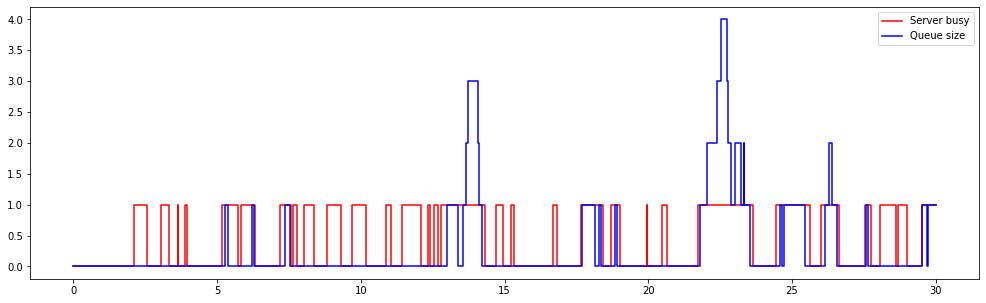

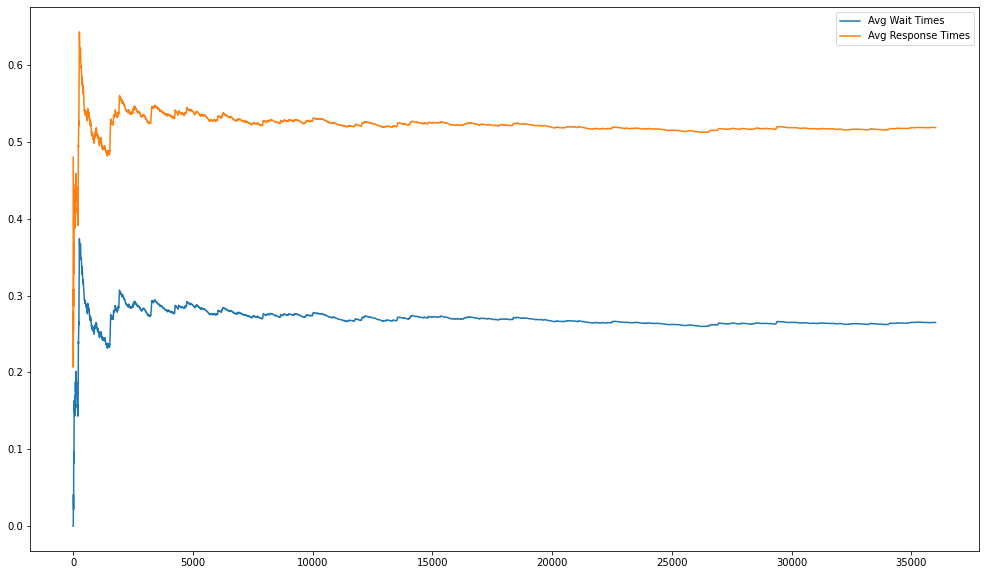

In [35]:
# Plot the server busyness and queue size
start_t = 0
end_t = 30

tmp_jump = []
tmp_queue = []
for j in jump_times:
    if j[0] < start_t:
        continue
    if j[0] > end_t:
        break
    tmp_jump.append(j)
tmp_jump.append([end_t,tmp_jump[-1][1]])

for q in queue_size:
    if q[0] < start_t:
        continue
    if q[0] > end_t:
        break
    tmp_queue.append(q)
tmp_queue.append([end_t,tmp_queue[-1][1]])

plt.figure(figsize=(17,5))
plt.step([q[0] for q in tmp_jump], [q[1] for q in tmp_jump], 'r', where='post', label = 'Server busy')
plt.step([q[0] for q in tmp_queue], [q[1] for q in tmp_queue], 'b', where='post', label = 'Queue size')
plt.legend()
plt.show()

# Plot the average response and waiting times
avg_wait = []
n = 1
tot = 0
for w in waiting_times:
    tot += w
    avg_wait.append(tot/n)
    n += 1

avg_resp = []
n = 1
tot = 0
for w in response_times:
    tot += w
    avg_resp.append(tot/n)
    n += 1

plt.figure(figsize=(17,10))
plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "Avg Wait Times")
plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "Avg Response Times")
plt.legend()
plt.show()